# Fashion MNIST 
 
<img src="https://tensorflow.org/images/fashion-mnist-sprite.png"  height='300' width='500'/>
 
 
Fashion MNIST is a collection of 28x28 images containing 70,000 grayscale images in 10 categories. In this notebook we will analyze this dataset using two diferent neural networks: a fully connected network and a convolutional network.

## Fully Connected Network

In [1]:
# imports for array-handling and plotting
%matplotlib inline

import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt

# fix random seed for reproducibility
np.random.seed(10)

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import fashion_mnist

## loads the dataset and divide into train and test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 5s 1us/step


In [3]:
## Show the dimentions of the data
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
y_train[0:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

<BarContainer object of 10 artists>

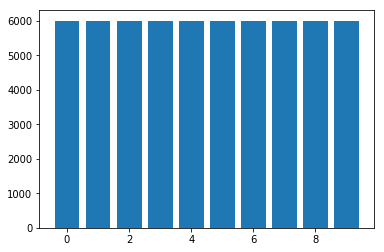

In [5]:
## How many classes and their counts
yn = np.unique(y_train, return_counts=True)
yn

## plot the frequency of y's
plt.bar(yn[0],yn[1])

We now check the first nine data rows (pictures) and check their labels:

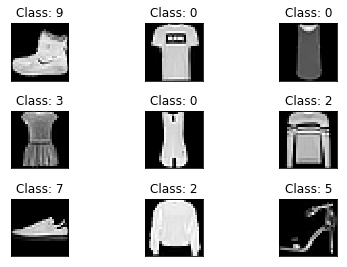

In [6]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Class: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:
<code> 
Label	Class
0	    T-shirt/top
1	    Trouser
2	    Pullover
3	    Dress
4	    Coat
5	    Sandal
6	    Shirt
7	    Sneaker
8	    Bag
9	    Ankle boot
</code> 
Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:               

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

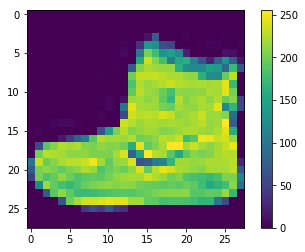

In [8]:
### images have values between 0 and 255

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)

In [9]:
# normalizing the data to help with the training
X_train = X_train / 255
X_test = X_test / 255

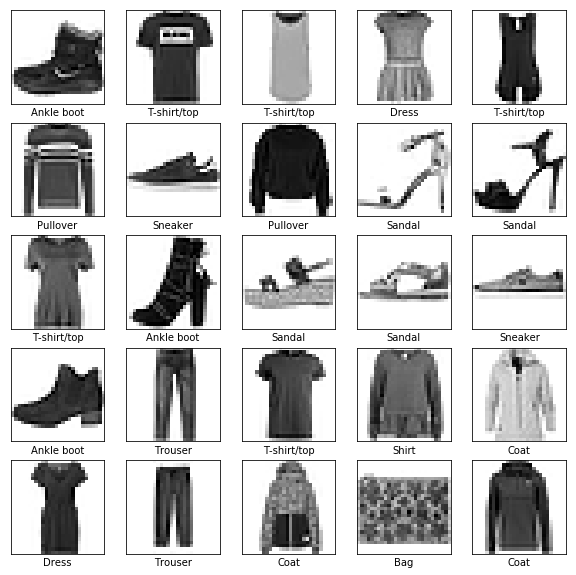

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])


Before procedding with the NN, we have to make a final transformation to the data: we have to change the format of the labels (y). For this we have to create an array of 10 positions for each y. Each position will indicate with a one if the y is the relevant category or zero if not:

<code>
y     ---->    Transformation
              0 1 2 3 4 5 6 7 8 9
0            [1,0,0,0,0,0,0,0,0,0]
1            [0,1,0,0,0,0,0,0,0,0]
    ...
8            [0,0,0,0,0,0,0,0,1,0]
9            [0,0,0,0,0,0,0,0,0,1]
</code>

This type of transformation is called one-hot encoding.

In [11]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


### First model based on Categorical Crossentropy as loss function

Now we will compile the model

Now we will proceed to build the network architecture. Our input layer consist on:

 1. A two dimentional matrix of 28x28. We will use a flatten layer as the first layer, what gives a layer with 784 nodes. 
 2. Then we will use a fully connected layer (dense) with 128 nodes, followed with a relu  activation layer. 
 3. Then another fully connected layer of 10 nodes, activated with a softmax layer. 
 4. The output layer consist of 10 nodes.

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))


In [13]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

and fit it...

In [14]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.5467 - acc: 0.8099 - val_loss: 0.4409 - val_acc: 0.8435
Epoch 2/20
 - 2s - loss: 0.3995 - acc: 0.8589 - val_loss: 0.4096 - val_acc: 0.8560
Epoch 3/20
 - 2s - loss: 0.3591 - acc: 0.8721 - val_loss: 0.3770 - val_acc: 0.8676
Epoch 4/20
 - 2s - loss: 0.3384 - acc: 0.8784 - val_loss: 0.3806 - val_acc: 0.8637
Epoch 5/20
 - 2s - loss: 0.3175 - acc: 0.8845 - val_loss: 0.3783 - val_acc: 0.8627
Epoch 6/20
 - 2s - loss: 0.3028 - acc: 0.8895 - val_loss: 0.3867 - val_acc: 0.8615
Epoch 7/20
 - 2s - loss: 0.2865 - acc: 0.8949 - val_loss: 0.3368 - val_acc: 0.8794
Epoch 8/20
 - 2s - loss: 0.2752 - acc: 0.8994 - val_loss: 0.3380 - val_acc: 0.8808
Epoch 9/20
 - 2s - loss: 0.2657 - acc: 0.9030 - val_loss: 0.3246 - val_acc: 0.8869
Epoch 10/20
 - 2s - loss: 0.2600 - acc: 0.9042 - val_loss: 0.3257 - val_acc: 0.8813
Epoch 11/20
 - 2s - loss: 0.2485 - acc: 0.9084 - val_loss: 0.3242 - val_acc: 0.8857
Epoch 12/20
 - 2s - loss: 0.2420 - 

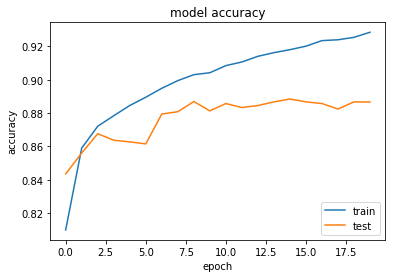

In [15]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

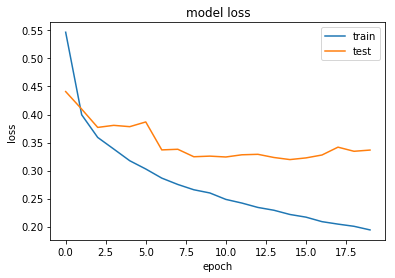

In [16]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


### Second model based on Sparse Categorical Crossentropy as loss function


In [17]:
# compiling the sequential model
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
##### here we use the labels without one-hot-encoding !!!

res = model.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.1905 - acc: 0.9304 - val_loss: 0.3316 - val_acc: 0.8892
Epoch 2/20
 - 2s - loss: 0.1879 - acc: 0.9306 - val_loss: 0.3242 - val_acc: 0.8901
Epoch 3/20
 - 2s - loss: 0.1810 - acc: 0.9335 - val_loss: 0.3485 - val_acc: 0.8852
Epoch 4/20
 - 2s - loss: 0.1784 - acc: 0.9349 - val_loss: 0.3440 - val_acc: 0.8854
Epoch 5/20
 - 2s - loss: 0.1739 - acc: 0.9361 - val_loss: 0.3576 - val_acc: 0.8845
Epoch 6/20
 - 2s - loss: 0.1702 - acc: 0.9376 - val_loss: 0.3554 - val_acc: 0.8861
Epoch 7/20
 - 2s - loss: 0.1655 - acc: 0.9391 - val_loss: 0.3381 - val_acc: 0.8916
Epoch 8/20
 - 2s - loss: 0.1621 - acc: 0.9403 - val_loss: 0.3433 - val_acc: 0.8886
Epoch 9/20
 - 1s - loss: 0.1573 - acc: 0.9428 - val_loss: 0.3509 - val_acc: 0.8873
Epoch 10/20
 - 2s - loss: 0.1547 - acc: 0.9433 - val_loss: 0.3566 - val_acc: 0.8893
Epoch 11/20
 - 2s - loss: 0.1515 - acc: 0.9448 - val_loss: 0.3648 - val_acc: 0.8887
Epoch 12/20
 - 1s - loss: 0.1477 - 

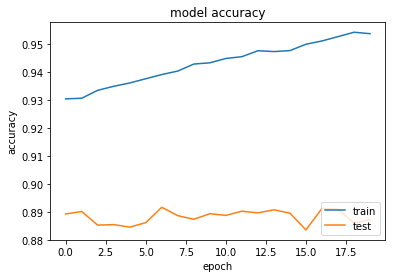

In [19]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

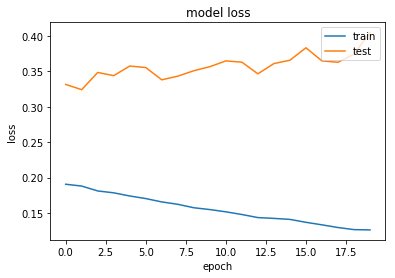

In [20]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


##  Third model - now we will add dropout layers

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [22]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [23]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.6641 - acc: 0.7680 - val_loss: 0.4874 - val_acc: 0.8295
Epoch 2/20
 - 2s - loss: 0.4885 - acc: 0.8237 - val_loss: 0.4390 - val_acc: 0.8462
Epoch 3/20
 - 2s - loss: 0.4478 - acc: 0.8384 - val_loss: 0.4116 - val_acc: 0.8520
Epoch 4/20
 - 2s - loss: 0.4229 - acc: 0.8467 - val_loss: 0.3949 - val_acc: 0.8573
Epoch 5/20
 - 2s - loss: 0.4075 - acc: 0.8500 - val_loss: 0.3803 - val_acc: 0.8639
Epoch 6/20
 - 2s - loss: 0.3902 - acc: 0.8582 - val_loss: 0.3661 - val_acc: 0.8690
Epoch 7/20
 - 2s - loss: 0.3836 - acc: 0.8581 - val_loss: 0.3682 - val_acc: 0.8671
Epoch 8/20
 - 3s - loss: 0.3743 - acc: 0.8610 - val_loss: 0.3605 - val_acc: 0.8724
Epoch 9/20
 - 2s - loss: 0.3690 - acc: 0.8620 - val_loss: 0.3512 - val_acc: 0.8722
Epoch 10/20
 - 3s - loss: 0.3642 - acc: 0.8658 - val_loss: 0.3459 - val_acc: 0.8738
Epoch 11/20
 - 2s - loss: 0.3568 - acc: 0.8684 - val_loss: 0.3500 - val_acc: 0.8732
Epoch 12/20
 - 2s - loss: 0.3552 - 

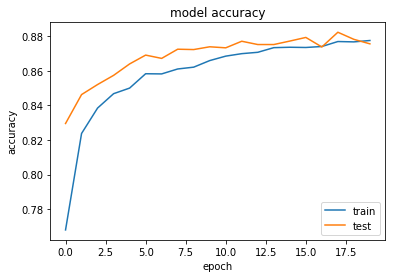

In [24]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

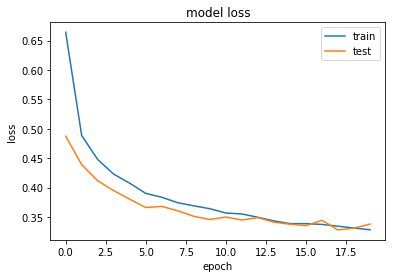

In [25]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


## Fourth model - Additional layer



In [26]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dropout(0.20))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.30))

model.add(Dense(10))
model.add(Activation('softmax'))


In [27]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [28]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.7643 - acc: 0.7303 - val_loss: 0.4761 - val_acc: 0.8329
Epoch 2/20
 - 2s - loss: 0.5117 - acc: 0.8174 - val_loss: 0.4218 - val_acc: 0.8441
Epoch 3/20
 - 2s - loss: 0.4632 - acc: 0.8323 - val_loss: 0.4184 - val_acc: 0.8474
Epoch 4/20
 - 2s - loss: 0.4392 - acc: 0.8416 - val_loss: 0.3858 - val_acc: 0.8635
Epoch 5/20
 - 2s - loss: 0.4212 - acc: 0.8461 - val_loss: 0.3788 - val_acc: 0.8635
Epoch 6/20
 - 2s - loss: 0.4105 - acc: 0.8498 - val_loss: 0.3714 - val_acc: 0.8645
Epoch 7/20
 - 2s - loss: 0.3963 - acc: 0.8551 - val_loss: 0.3758 - val_acc: 0.8631
Epoch 8/20
 - 2s - loss: 0.3924 - acc: 0.8577 - val_loss: 0.3569 - val_acc: 0.8686
Epoch 9/20
 - 2s - loss: 0.3834 - acc: 0.8608 - val_loss: 0.3493 - val_acc: 0.8742
Epoch 10/20
 - 2s - loss: 0.3738 - acc: 0.8626 - val_loss: 0.3521 - val_acc: 0.8735
Epoch 11/20
 - 2s - loss: 0.3718 - acc: 0.8655 - val_loss: 0.3553 - val_acc: 0.8702
Epoch 12/20
 - 2s - loss: 0.3659 - 

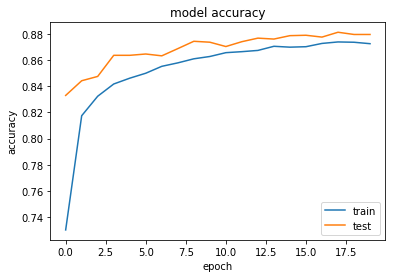

In [29]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

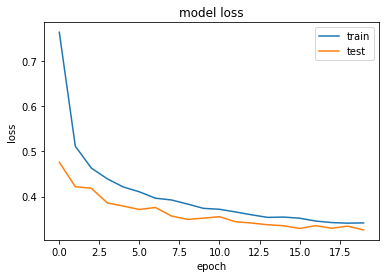

In [30]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


## Fifth model - Convolutional Neural Networks


In [31]:
## data preprocessing

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [38]:
model = Sequential()
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1),padding='same',activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())
          
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [39]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
__________

In [41]:
res = model.fit(X_train, Y_train,
          batch_size=1000, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 43s - loss: 1.1449 - acc: 0.5723 - val_loss: 0.6713 - val_acc: 0.7507
Epoch 2/20
 - 38s - loss: 0.6371 - acc: 0.7577 - val_loss: 0.5438 - val_acc: 0.7916
Epoch 3/20
 - 38s - loss: 0.5536 - acc: 0.7935 - val_loss: 0.4840 - val_acc: 0.8261
Epoch 4/20
 - 39s - loss: 0.4946 - acc: 0.8194 - val_loss: 0.4276 - val_acc: 0.8474
Epoch 5/20
 - 38s - loss: 0.4604 - acc: 0.8326 - val_loss: 0.4030 - val_acc: 0.8531
Epoch 6/20
 - 38s - loss: 0.4313 - acc: 0.8427 - val_loss: 0.3781 - val_acc: 0.8641
Epoch 7/20
 - 38s - loss: 0.4082 - acc: 0.8521 - val_loss: 0.3619 - val_acc: 0.8705
Epoch 8/20
 - 38s - loss: 0.3932 - acc: 0.8578 - val_loss: 0.3462 - val_acc: 0.8764
Epoch 9/20
 - 38s - loss: 0.3776 - acc: 0.8629 - val_loss: 0.3345 - val_acc: 0.8779
Epoch 10/20
 - 38s - loss: 0.3614 - acc: 0.8681 - val_loss: 0.3230 - val_acc: 0.8820
Epoch 11/20
 - 38s - loss: 0.3509 - acc: 0.8729 - val_loss: 0.3141 - val_acc: 0.8867
Epoch 12/20
 - 38s - los

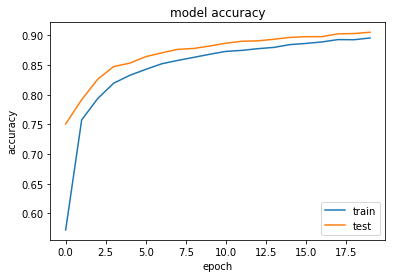

In [42]:
# plotting the metrics: Accuracy
plt.plot(res.history['acc'])
plt.plot(res.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

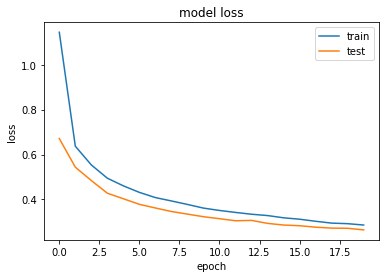

In [43]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


In [44]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(14,14))
    labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    
    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{} | Pred:{}".format(labels[y_test[indx]],labels[predicted_classes[indx]]))
    plt.show()    

In [45]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)


In [46]:
p = predicted_classes[:10000]
y = y_test[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [47]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9052
Incorrect predicted classes: 948


In [48]:
from sklearn.metrics import classification_report
#target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.90      0.89      0.90      1000
        Coat       0.83      0.87      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.73      0.71      0.72      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



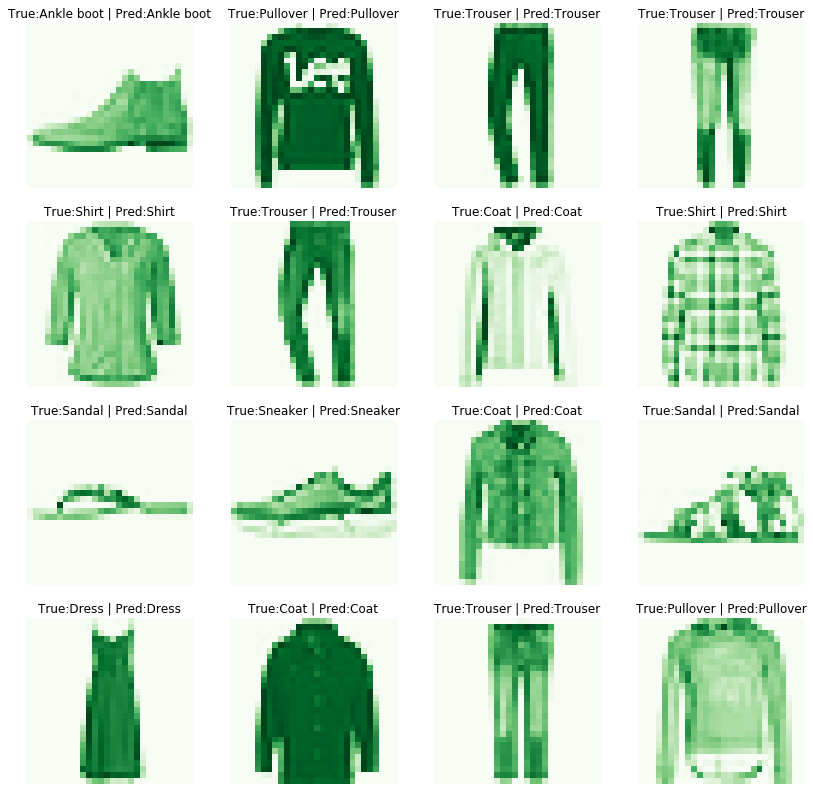

In [49]:
plot_images(correct, "Greens")

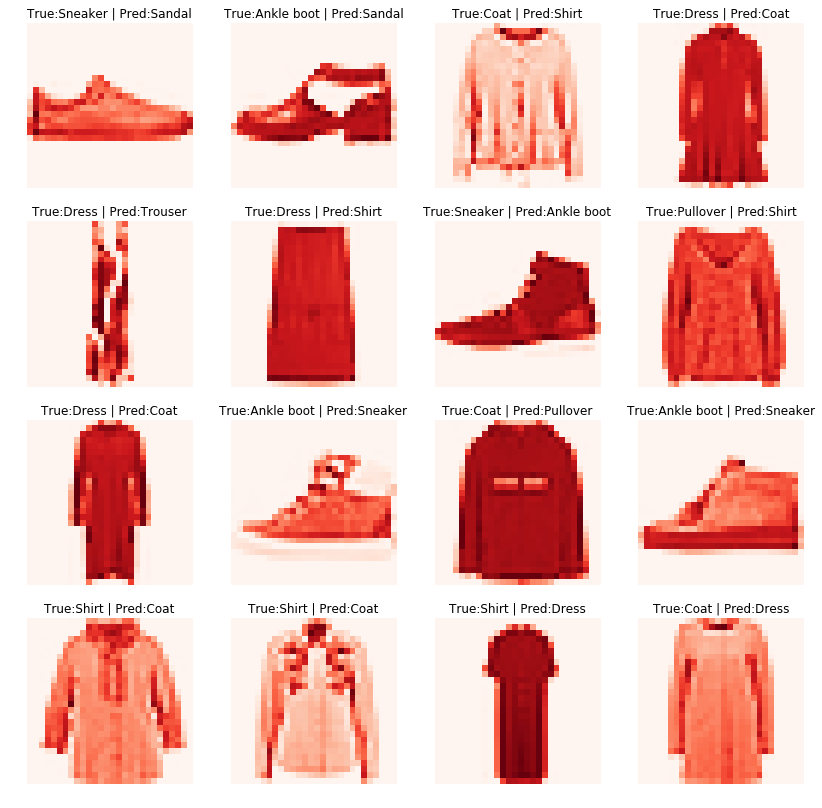

In [50]:
plot_images(incorrect, "Reds")